# Agregacion de datos por categoria

In [1]:
import pandas as pd
import numpy as np

In [2]:
genero = ["Hombre","Mujer"]
ingresos = ["Baja","Clase Media", "Rica"]

In [4]:
n = 500
data_genero = []
data_ingresos = []

for i in range(0,n):
    data_genero.append(np.random.choice(genero))
    data_ingresos.append(np.random.choice(ingresos))

In [5]:
data_genero[:8]

['Hombre', 'Hombre', 'Hombre', 'Mujer', 'Hombre', 'Hombre', 'Mujer', 'Mujer']

In [6]:
data_ingresos[:8]

['Rica', 'Clase Media', 'Baja', 'Baja', 'Rica', 'Rica', 'Rica', 'Clase Media']

In [7]:
#z -> N(0,1)
altura = 160 + 30 *np.random.randn(n)
peso = 65+25 + np.random.randn(n)
edad = 30 + 12 +np.random.randn(n)
ingresos = 1800 + 3500 * np.random.randn(n)

In [8]:
data = pd.DataFrame(
    {
        "Genero":data_genero,
        "Estatus":data_ingresos,
        "Altura":altura,
        "Peso":peso,
        "Edad":edad,
        "Ingresos":ingresos
    }
)

In [9]:
data.head()

,Genero,Estatus,Altura,Peso,Edad,Ingresos
0,Hombre,Rica,203.468886,90.910253,43.207876,703.240349
1,Hombre,Clase Media,169.680631,89.002757,43.616247,4840.413682
2,Hombre,Baja,137.668899,90.423808,42.517472,3708.871476
3,Mujer,Baja,131.154712,91.607230,42.366535,-3301.093461
4,Hombre,Rica,172.533403,90.493880,42.066793,-152.611108


# Agrupacion de datos

In [11]:
grupo_genero = data.groupby("Genero")

In [12]:
grupo_genero.groups

{'Hombre': Int64Index([  0,   1,   2,   4,   5,   8,   9,  11,  16,  20,
             ...
             474, 475, 477, 480, 486, 488, 491, 494, 495, 499],
            dtype='int64', length=220),
 'Mujer': Int64Index([  3,   6,   7,  10,  12,  13,  14,  15,  17,  18,
             ...
             484, 485, 487, 489, 490, 492, 493, 496, 497, 498],
            dtype='int64', length=280)}

In [14]:
for names, groups in grupo_genero:
    print(names)
    print(groups)

Hombre
     Genero      Estatus      Altura       Peso       Edad     Ingresos
0    Hombre         Rica  203.468886  90.910253  43.207876   703.240349
1    Hombre  Clase Media  169.680631  89.002757  43.616247  4840.413682
2    Hombre         Baja  137.668899  90.423808  42.517472  3708.871476
4    Hombre         Rica  172.533403  90.493880  42.066793  -152.611108
5    Hombre         Rica  190.537183  90.009321  41.231003  1103.246579
..      ...          ...         ...        ...        ...          ...
488  Hombre         Baja  141.926949  91.257277  42.552000  8640.636333
491  Hombre         Baja   86.365070  89.199316  42.075813 -2590.611867
494  Hombre         Rica  117.038271  88.961703  42.602022  1248.925029
495  Hombre  Clase Media  123.211506  91.253614  42.073942 -1384.006832
499  Hombre         Rica  118.433528  90.695313  42.785656 -4252.965244

[220 rows x 6 columns]
Mujer
    Genero      Estatus      Altura       Peso       Edad      Ingresos
3    Mujer         Baja  13

In [16]:
grupo_genero.get_group("Mujer")

,Genero,Estatus,Altura,Peso,Edad,Ingresos
3,Mujer,Baja,131.154712,91.607230,42.366535,-3301.093461
6,Mujer,Rica,194.491116,88.865405,42.681885,4735.153673
7,Mujer,Clase Media,185.912626,90.423239,40.502920,-867.283401
10,Mujer,Clase Media,189.139014,88.660598,40.860392,11170.820312
12,Mujer,Rica,123.883250,90.008331,42.515160,-862.826408
...,...,...,...,...,...,...
492,Mujer,Clase Media,182.815066,89.033982,43.444821,655.778604
493,Mujer,Rica,170.921226,90.939366,42.896909,-2207.167684
496,Mujer,Rica,166.261940,91.043453,41.499375,5271.884087
497,Mujer,Clase Media,123.627172,90.034641,43.072920,1964.749236


In [17]:
grupo_doble = data.groupby(["Genero","Estatus"])

In [18]:
len(grupo_doble)

6

In [19]:
for names, groups in grupo_doble:
    print(names)
    print(groups)

('Hombre', 'Baja')
     Genero Estatus      Altura       Peso       Edad     Ingresos
2    Hombre    Baja  137.668899  90.423808  42.517472  3708.871476
9    Hombre    Baja  204.250809  89.298291  42.076182  -502.702313
26   Hombre    Baja  210.734187  89.937042  41.048342  5520.232205
29   Hombre    Baja  143.555107  89.955610  40.333390  3767.585690
32   Hombre    Baja  176.967922  88.694475  42.784041  1343.785706
..      ...     ...         ...        ...        ...          ...
473  Hombre    Baja  182.377420  90.399415  41.659193  2536.943850
475  Hombre    Baja  155.148314  88.425765  42.801950  7335.310170
477  Hombre    Baja  102.759948  90.415657  40.884464 -1286.460811
488  Hombre    Baja  141.926949  91.257277  42.552000  8640.636333
491  Hombre    Baja   86.365070  89.199316  42.075813 -2590.611867

[65 rows x 6 columns]
('Hombre', 'Clase Media')
     Genero      Estatus      Altura       Peso       Edad     Ingresos
1    Hombre  Clase Media  169.680631  89.002757  43.6162

# Operaciones sobre datos agrupados

In [20]:
grupo_doble.sum()

Altura         Peso         Edad       Ingresos
Genero Estatus                                                           
Hombre Baja         10683.819700  5843.788420  2746.668207  170652.003505
       Clase Media  12147.688883  6845.627428  3205.533845  145478.992946
       Rica         12477.413981  7108.729750  3332.711867  161481.065871
Mujer  Baja         14158.082020  7829.506468  3664.953133  190659.363746
       Clase Media  13999.930354  7826.603098  3647.284323  202645.768676
       Rica         16619.064951  9534.839853  4436.534264  181079.434900

In [21]:
grupo_doble.mean()

Altura       Peso       Edad     Ingresos
Genero Estatus                                                   
Hombre Baja         164.366457  89.904437  42.256434  2625.415439
       Clase Media  159.838012  90.074045  42.178077  1914.197276
       Rica         157.941949  89.983921  42.186226  2044.064125
Mujer  Baja         162.736575  89.994327  42.125898  2191.486940
       Clase Media  160.918740  89.960955  41.922808  2329.261709
       Rica         156.783632  89.951319  41.854097  1708.296556

In [22]:
grupo_doble.size()

Genero  Estatus    
Hombre  Baja            65
        Clase Media     76
        Rica            79
Mujer   Baja            87
        Clase Media     87
        Rica           106
dtype: int64

In [23]:
grupo_doble.describe()

Altura                                                 \
                    count        mean        std         min         25%   
Genero Estatus                                                             
Hombre Baja          65.0  164.366457  32.873622   86.365070  143.367297   
       Clase Media   76.0  159.838012  31.503652  106.621406  135.600667   
       Rica          79.0  157.941949  26.727896   99.560982  137.719737   
Mujer  Baja          87.0  162.736575  31.403581   88.901423  146.475441   
       Clase Media   87.0  160.918740  31.756029   82.446474  139.282111   
       Rica         106.0  156.783632  28.935488   86.708322  133.209371   

                                                         Peso             ...  \
                           50%         75%         max  count       mean  ...   
Genero Estatus                                                            ...   
Hombre Baja         166.098625  183.988608  231.889090   65.0  89.904437  ...   
       Clase Media  158.127065  175.840284  235.322884   76.0  90.074045  ...   
       Rica         155.621578  177.284883  225.687749   79.0  89.983921  ...   
Mujer  Baja         164.638540  179.475217  222.934468   87.0  89.994327  ...   
       Clase Media  159.183914  185.317886  247.497886   87.0  89.960955  ...   
       Rica         159.728229  178.992776  225.144265  106.0  89.951319  ...   

                         Edad            Ingresos                            \
                          75%        max    count         mean          std   
Genero Estatus                                                                
Hombre Baja         42.831529  44.657015     65.0  2625.415439  3174.286737   
       Clase Media  42.838808  44.666641     76.0  1914.197276  3828.844962   
       Rica         42.693962  44.570702     79.0  2044.064125  3493.957372   
Mujer  Baja         42.704144  43.890187     87.0  2191.486940  3854.592702   
       Clase Media  42.579564  43.770368     87.0  2329.261709  3480.289404   
       Rica         42.653130  43.626379    106.0  1708.296556  3204.460196   

                                                                       \
                            min         25%          50%          75%   
Genero Estatus                                                          
Hombre Baja        -3306.777138  637.542598  2495.428061  4612.336221   
       Clase Media -6258.692936 -599.479168  1558.978121  4904.116139   
       Rica        -6793.594046    1.414102  1811.191424  4323.135139   
Mujer  Baja        -6953.741063 -519.243518  2177.672091  5443.347460   
       Clase Media -6896.231906  180.175957  2322.951324  4435.880429   
       Rica        -5692.766597 -442.397594  1577.404163  4088.750673   

                                  
                             max  
Genero Estatus                    
Hombre Baja         10608.354722  
       Clase Media  12251.848819  
       Rica         12303.533345  
Mujer  Baja         10888.824053  
       Clase Media  11170.820312  
       Rica         11455.663146  

[6 rows x 32 columns]

In [26]:
grupo_ingreso = grupo_doble["Ingresos"]

In [27]:
grupo_ingreso.describe()

count         mean          std          min         25%  \
Genero Estatus                                                                 
Hombre Baja          65.0  2625.415439  3174.286737 -3306.777138  637.542598   
       Clase Media   76.0  1914.197276  3828.844962 -6258.692936 -599.479168   
       Rica          79.0  2044.064125  3493.957372 -6793.594046    1.414102   
Mujer  Baja          87.0  2191.486940  3854.592702 -6953.741063 -519.243518   
       Clase Media   87.0  2329.261709  3480.289404 -6896.231906  180.175957   
       Rica         106.0  1708.296556  3204.460196 -5692.766597 -442.397594   

                            50%          75%           max  
Genero Estatus                                              
Hombre Baja         2495.428061  4612.336221  10608.354722  
       Clase Media  1558.978121  4904.116139  12251.848819  
       Rica         1811.191424  4323.135139  12303.533345  
Mujer  Baja         2177.672091  5443.347460  10888.824053  
       Clase Media  2322.951324  4435.880429  11170.820312  
       Rica         1577.404163  4088.750673  11455.663146

In [29]:
grupo_doble.aggregate(
    {
        "Ingresos":np.sum,
        "Edad":np.mean,
        "Altura":np.std
    }
)

Ingresos       Edad     Altura
Genero Estatus                                         
Hombre Baja         170652.003505  42.256434  32.873622
       Clase Media  145478.992946  42.178077  31.503652
       Rica         161481.065871  42.186226  26.727896
Mujer  Baja         190659.363746  42.125898  31.403581
       Clase Media  202645.768676  41.922808  31.756029
       Rica         181079.434900  41.854097  28.935488

In [31]:
grupo_doble.aggregate(
    {
        "Edad":np.mean,
        "Altura": lambda alt:np.mean(alt)-np.std(alt)
    }
)

Edad      Altura
Genero Estatus                           
Hombre Baja         42.256434  131.746689
       Clase Media  42.178077  128.542307
       Rica         42.186226  131.383756
Mujer  Baja         42.125898  131.513996
       Clase Media  41.922808  129.345744
       Rica         41.854097  127.984956

In [32]:
grupo_doble.aggregate([np.sum,np.mean,np.std])

Altura                                Peso  \
                             sum        mean        std          sum   
Genero Estatus                                                         
Hombre Baja         10683.819700  164.366457  32.873622  5843.788420   
       Clase Media  12147.688883  159.838012  31.503652  6845.627428   
       Rica         12477.413981  157.941949  26.727896  7108.729750   
Mujer  Baja         14158.082020  162.736575  31.403581  7829.506468   
       Clase Media  13999.930354  160.918740  31.756029  7826.603098   
       Rica         16619.064951  156.783632  28.935488  9534.839853   

                                                Edad                       \
                         mean       std          sum       mean       std   
Genero Estatus                                                              
Hombre Baja         89.904437  0.893759  2746.668207  42.256434  0.938037   
       Clase Media  90.074045  1.029746  3205.533845  42.178077  1.036175   
       Rica         89.983921  0.896532  3332.711867  42.186226  0.921197   
Mujer  Baja         89.994327  0.985152  3664.953133  42.125898  0.894463   
       Clase Media  89.960955  0.973679  3647.284323  41.922808  0.895694   
       Rica         89.951319  0.960900  4436.534264  41.854097  0.871700   

                         Ingresos                            
                              sum         mean          std  
Genero Estatus                                               
Hombre Baja         170652.003505  2625.415439  3174.286737  
       Clase Media  145478.992946  1914.197276  3828.844962  
       Rica         161481.065871  2044.064125  3493.957372  
Mujer  Baja         190659.363746  2191.486940  3854.592702  
       Clase Media  202645.768676  2329.261709  3480.289404  
       Rica         181079.434900  1708.296556  3204.460196

In [33]:
grupo_doble.aggregate([lambda x: np.mean(x)/np.std(x)])

Altura        Peso       Edad  Ingresos
                    <lambda>    <lambda>   <lambda>  <lambda>
Genero Estatus                                               
Hombre Baja         5.038860  101.374228  45.398278  0.833525
       Clase Media  5.107347   88.053326  40.976019  0.503263
       Rica         5.947014  101.010245  46.087625  0.588767
Mujer  Baja         5.212144   91.880314  47.369329  0.571835
       Clase Media  5.096721   92.928413  47.076173  0.673152
       Rica         5.444126   94.056247  48.242443  0.535632

# Filtrado de datos

In [34]:
grupo_doble.sum()

Altura         Peso         Edad       Ingresos
Genero Estatus                                                           
Hombre Baja         10683.819700  5843.788420  2746.668207  170652.003505
       Clase Media  12147.688883  6845.627428  3205.533845  145478.992946
       Rica         12477.413981  7108.729750  3332.711867  161481.065871
Mujer  Baja         14158.082020  7829.506468  3664.953133  190659.363746
       Clase Media  13999.930354  7826.603098  3647.284323  202645.768676
       Rica         16619.064951  9534.839853  4436.534264  181079.434900

In [35]:
#Suma de edades del grupo > 3400
grupo_doble["Edad"].filter(lambda x: x.sum()>3400)

3      42.366535
6      42.681885
7      40.502920
10     40.860392
12     42.515160
         ...    
492    43.444821
493    42.896909
496    41.499375
497    43.072920
498    41.391578
Name: Edad, Length: 280, dtype: float64

# Transformacion de variables

In [38]:
zscore = lambda x: (x - x.mean()/x.std())

In [41]:
z_group=grupo_doble.transform(zscore)

In [47]:
import matplotlib.pyplot as plt

(array([ 21.,  82., 123., 119.,  58.,  20.,  13.,  31.,  24.,   9.]),
 array([-8.24614313, -7.02541948, -5.80469583, -4.58397218, -3.36324853,
        -2.14252487, -0.92180122,  0.29892243,  1.51964608,  2.74036973,
         3.96109338]),
 <a list of 10 Patch objects>)

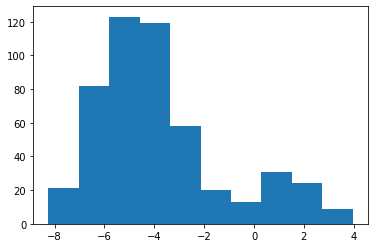

In [48]:
plt.hist(z_group["Edad"])

In [49]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [50]:
grupo_doble.transform(fill_na_mean)

,Altura,Peso,Edad,Ingresos
0,203.468886,90.910253,43.207876,703.240349
1,169.680631,89.002757,43.616247,4840.413682
2,137.668899,90.423808,42.517472,3708.871476
3,131.154712,91.607230,42.366535,-3301.093461
4,172.533403,90.493880,42.066793,-152.611108
...,...,...,...,...
495,123.211506,91.253614,42.073942,-1384.006832
496,166.261940,91.043453,41.499375,5271.884087
497,123.627172,90.034641,43.072920,1964.749236
498,170.719900,89.515929,41.391578,3547.944412


## operaciones diversas utiles

In [51]:
grupo_doble.head(1)

,Genero,Estatus,Altura,Peso,Edad,Ingresos
0,Hombre,Rica,203.468886,90.910253,43.207876,703.240349
1,Hombre,Clase Media,169.680631,89.002757,43.616247,4840.413682
2,Hombre,Baja,137.668899,90.423808,42.517472,3708.871476
3,Mujer,Baja,131.154712,91.607230,42.366535,-3301.093461
6,Mujer,Rica,194.491116,88.865405,42.681885,4735.153673
7,Mujer,Clase Media,185.912626,90.423239,40.502920,-867.283401


In [52]:
grupo_doble.tail(1)

,Genero,Estatus,Altura,Peso,Edad,Ingresos
491,Hombre,Baja,86.365070,89.199316,42.075813,-2590.611867
495,Hombre,Clase Media,123.211506,91.253614,42.073942,-1384.006832
496,Mujer,Rica,166.261940,91.043453,41.499375,5271.884087
497,Mujer,Clase Media,123.627172,90.034641,43.072920,1964.749236
498,Mujer,Baja,170.719900,89.515929,41.391578,3547.944412
499,Hombre,Rica,118.433528,90.695313,42.785656,-4252.965244


In [53]:
grupo_doble.nth(23)

Altura       Peso       Edad     Ingresos
Genero Estatus                                                   
Hombre Baja         148.115035  90.516483  42.673165  4961.505994
       Clase Media  178.320323  89.999455  42.343671 -2712.379981
       Rica         201.213424  89.320388  41.903107   760.035262
Mujer  Baja         141.563511  90.027992  41.004402  9350.491237
       Clase Media  133.666809  89.616060  41.309776  5144.407028
       Rica         147.410990  88.865985  41.866446  -393.604247

In [54]:
data_sorted = data.sort_values(["Edad","Ingresos"])

In [55]:
data_sorted.head()

,Genero,Estatus,Altura,Peso,Edad,Ingresos
50,Mujer,Clase Media,173.707280,90.267116,39.547055,4417.022438
89,Hombre,Rica,225.687749,90.589759,39.586868,2859.241174
223,Mujer,Baja,212.171772,90.274675,39.694726,3051.918395
385,Hombre,Baja,166.098625,88.870782,39.694969,-1809.407068
368,Mujer,Rica,217.457309,89.448912,39.768202,-3643.837741


In [56]:
grupo_edad = data_sorted.groupby(["Genero"])

In [58]:
grupo_edad.head(1)

,Genero,Estatus,Altura,Peso,Edad,Ingresos
50,Mujer,Clase Media,173.707280,90.267116,39.547055,4417.022438
89,Hombre,Rica,225.687749,90.589759,39.586868,2859.241174


In [59]:
grupo_edad.tail(1)

,Genero,Estatus,Altura,Peso,Edad,Ingresos
226,Mujer,Baja,117.103098,88.729997,43.890187,-1119.499474
436,Hombre,Clase Media,142.697895,91.155861,44.666641,5574.939452


# Conjunto de entrenamiento y conjunto de validacion

In [6]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [7]:
len(data)

3333

# Dividir utilizando la distribucion normal

(array([ 12.,  62., 204., 431., 713., 820., 625., 318., 114.,  34.]),
 array([-3.25779622, -2.63996833, -2.02214044, -1.40431255, -0.78648466,
        -0.16865677,  0.44917112,  1.06699902,  1.68482691,  2.3026548 ,
         2.92048269]),
 <a list of 10 Patch objects>)

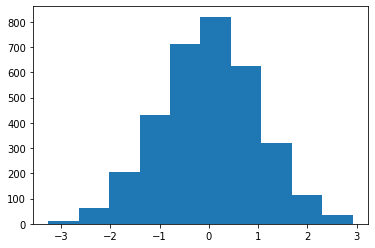

In [62]:
a = np.random.randn(len(data))
plt.hist(a)

In [63]:
check = (a < 0.8)
check

array([False,  True,  True, ..., False,  True,  True])

In [67]:
training = data[check]
testing = data[~check]

In [68]:
len(testing)

704

In [69]:
len(training)

2629

# Libreria sklearn

In [4]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(data, test_size = 0.2)

In [9]:
len(test)

667

In [10]:
len(train)

2666

## Usando una funcion de shuffle 

In [11]:
import numpy as np

In [12]:
#Mezclamos las filas del data set
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
import sklearn

In [16]:
data = sklearn.utils.shuffle(data)

In [19]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [20]:
len(train_data)

2499

In [21]:
len(test_data)

833